# Encontrando o melhor número de componentes principais para utilizar na redução de dimensionalidade do SESA Dataset

De acordo com https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe, é possível fazer uma análise do PCA olhando para a variância em função do número de componentes principais.

Pois bem. Esse jupyter tem como objetivo determinar qual é o melhor número de componentes principais para ser utilizado na redução de dimensionalidade do dataset SESA. Esse valor será amplamente utilizado na classe que extrai features, pois essa classe também é responsável por escalonar e reduzir a dimensão dos dados. Toda a implementação dessa classe está descrita no jupyter "Implementação de classe para extração de features - SESA Dataset".

Até o momento, possuímos um CSV com mais de 100 features. Esse CSV diz respeito aos dados da pasta de TREINO do SESA. Ele será utilizado para fazer a análise do PCA. Ou seja, o número de componentes principais que será escolhido terá base apenas nos dados de treinamento. Posteriormente, todos os dados serão reduzidos à essa nova dimensionalidade, até mesmo os de teste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

In [14]:
# ABRINDO O CSV COM NUMPY
caminhoCSV = '/home/dimi/Downloads/UrbanSound8K_Modificado_16kHz_8bits/train_semPCA.csv'
data = np.genfromtxt(caminhoCSV, delimiter=',')

# EXCLUINDO A PRIMEIRA COLUNA (ARQUIVO) E A ULTIMA (CLASSE)
data = data[:,1:-1]

In [15]:
objPCA = PCA().fit(data)

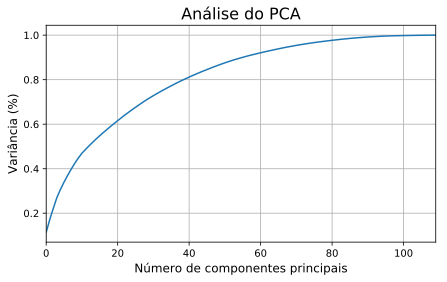

In [16]:
plt.figure()
plt.plot(np.cumsum(objPCA.explained_variance_ratio_))
plt.xlabel('Número de componentes principais')
plt.ylabel('Variância (%)')
plt.title('Análise do PCA')
plt.xlim(0,109)
plt.grid()
plt.show()

### Encontrando o número de features que garante 95% de variância

Pela célular abaixo, mostra-se que, se usarmos 53 componentes principais no PCA, conseguimos manter uma variância de 95%. Portanto, esse será o número escolhido para reduzir a dimensionalidade do SESA.

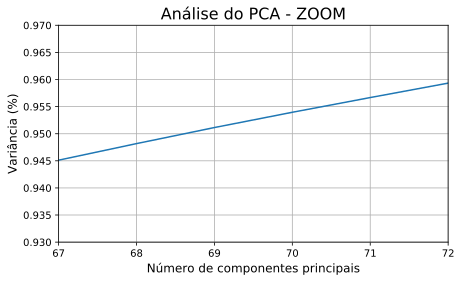

In [22]:
plt.figure()
plt.plot(np.cumsum(objPCA.explained_variance_ratio_))
plt.xlabel('Número de componentes principais')
plt.ylabel('Variância (%)')
plt.title('Análise do PCA - ZOOM')
plt.ylim(0.93, 0.97)
plt.xlim(67,72)
plt.grid()
plt.show()

## Usando PCA nesse dataset para criar um novo CSV

In [7]:
def reduzirDimensionalidade(dataframeGeral, nDimensoes):
    
    print("Reduzindo a dimensionalidade")
    
    # COPIANDO AS COLUNAS DE NOME E CLASSIFICACAO
    colunaArquivo       = dataframeGeral["nomeArquivo"]
    colunaClassificacao = dataframeGeral["classificacaoCorreta"]
    
    # DELETANDO AS COLUNAS ARQUIVO E CLASSIFICACAO
    dataframeGeral = dataframeGeral.drop(['nomeArquivo', 'classificacaoCorreta'], axis=1)
    
    # REDUZINDO A DIMENSIONALIDADE
    dataframeGeral = pd.DataFrame(PCA(n_components=nDimensoes).fit_transform(dataframeGeral))
    
    # COM ESSA COISA DE TIRA E POE COLUNA, O PANDAS NAO SABE LINDAR COM OS INDEXES,
    # ABAIXO EU ESTOU RESETANDO TUDO
    colunaArquivo.reset_index(inplace=True, drop=True)
    colunaClassificacao.reset_index(inplace=True, drop=True)
    dataframeGeral.reset_index(inplace=True, drop=True)
    
    # ADICIONANDO AS COLUNAS QUE FORAM EXCLUIDAS (posicaoNovaColuna, nomeNovaColuna, valorParaTodasAsLinhas)
    dataframeGeral.insert(0, "nomeArquivo", colunaArquivo, True)
    dataframeGeral.insert(len(dataframeGeral.columns), "classificacaoCorreta", colunaClassificacao, True)
    
    return dataframeGeral

In [28]:
caminhoCSV     = '/home/dimi/Downloads/UrbanSound8K_Modificado_16kHz_8bits/train_semPCA.csv'
dataframeGeral = pd.read_csv(caminhoCSV)

In [29]:
dataframeGeral = reduzirDimensionalidade(dataframeGeral, 70)

Reduzindo a dimensionalidade


In [30]:
dataframeGeral.to_csv('/home/dimi/Downloads/UrbanSound8K_Modificado_16kHz_8bits/train_70D.csv', index=False)  